In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from numba import njit

%run voter_model_with_mutation.ipynb

# Voter model with mutation
### For different grid sizes; L = 100, L = 200, L = 400

In [56]:
### Takes roughly 40 minutes

# Set initials
all_grids = []
all_grids_0 = []
all_num_species = []

list_L = [100, 200, 400]    # as in paper Durett & Levin (1995)
n_iters = int(5e8)

# Run voter model on grid sizes LxL for L = [100, 200, 400]
for L in list_L:
    alpha = 1/L**2          # as in paper Durett & Levin (1995)
    
    grid_0 = init_grid(L)
    grid, num_species = voter_model(grid_0, alpha, n_iters)
    
    all_grids_0.append(grid_0)
    all_grids.append(grid)
    all_num_species.append(num_species)



500000000.0


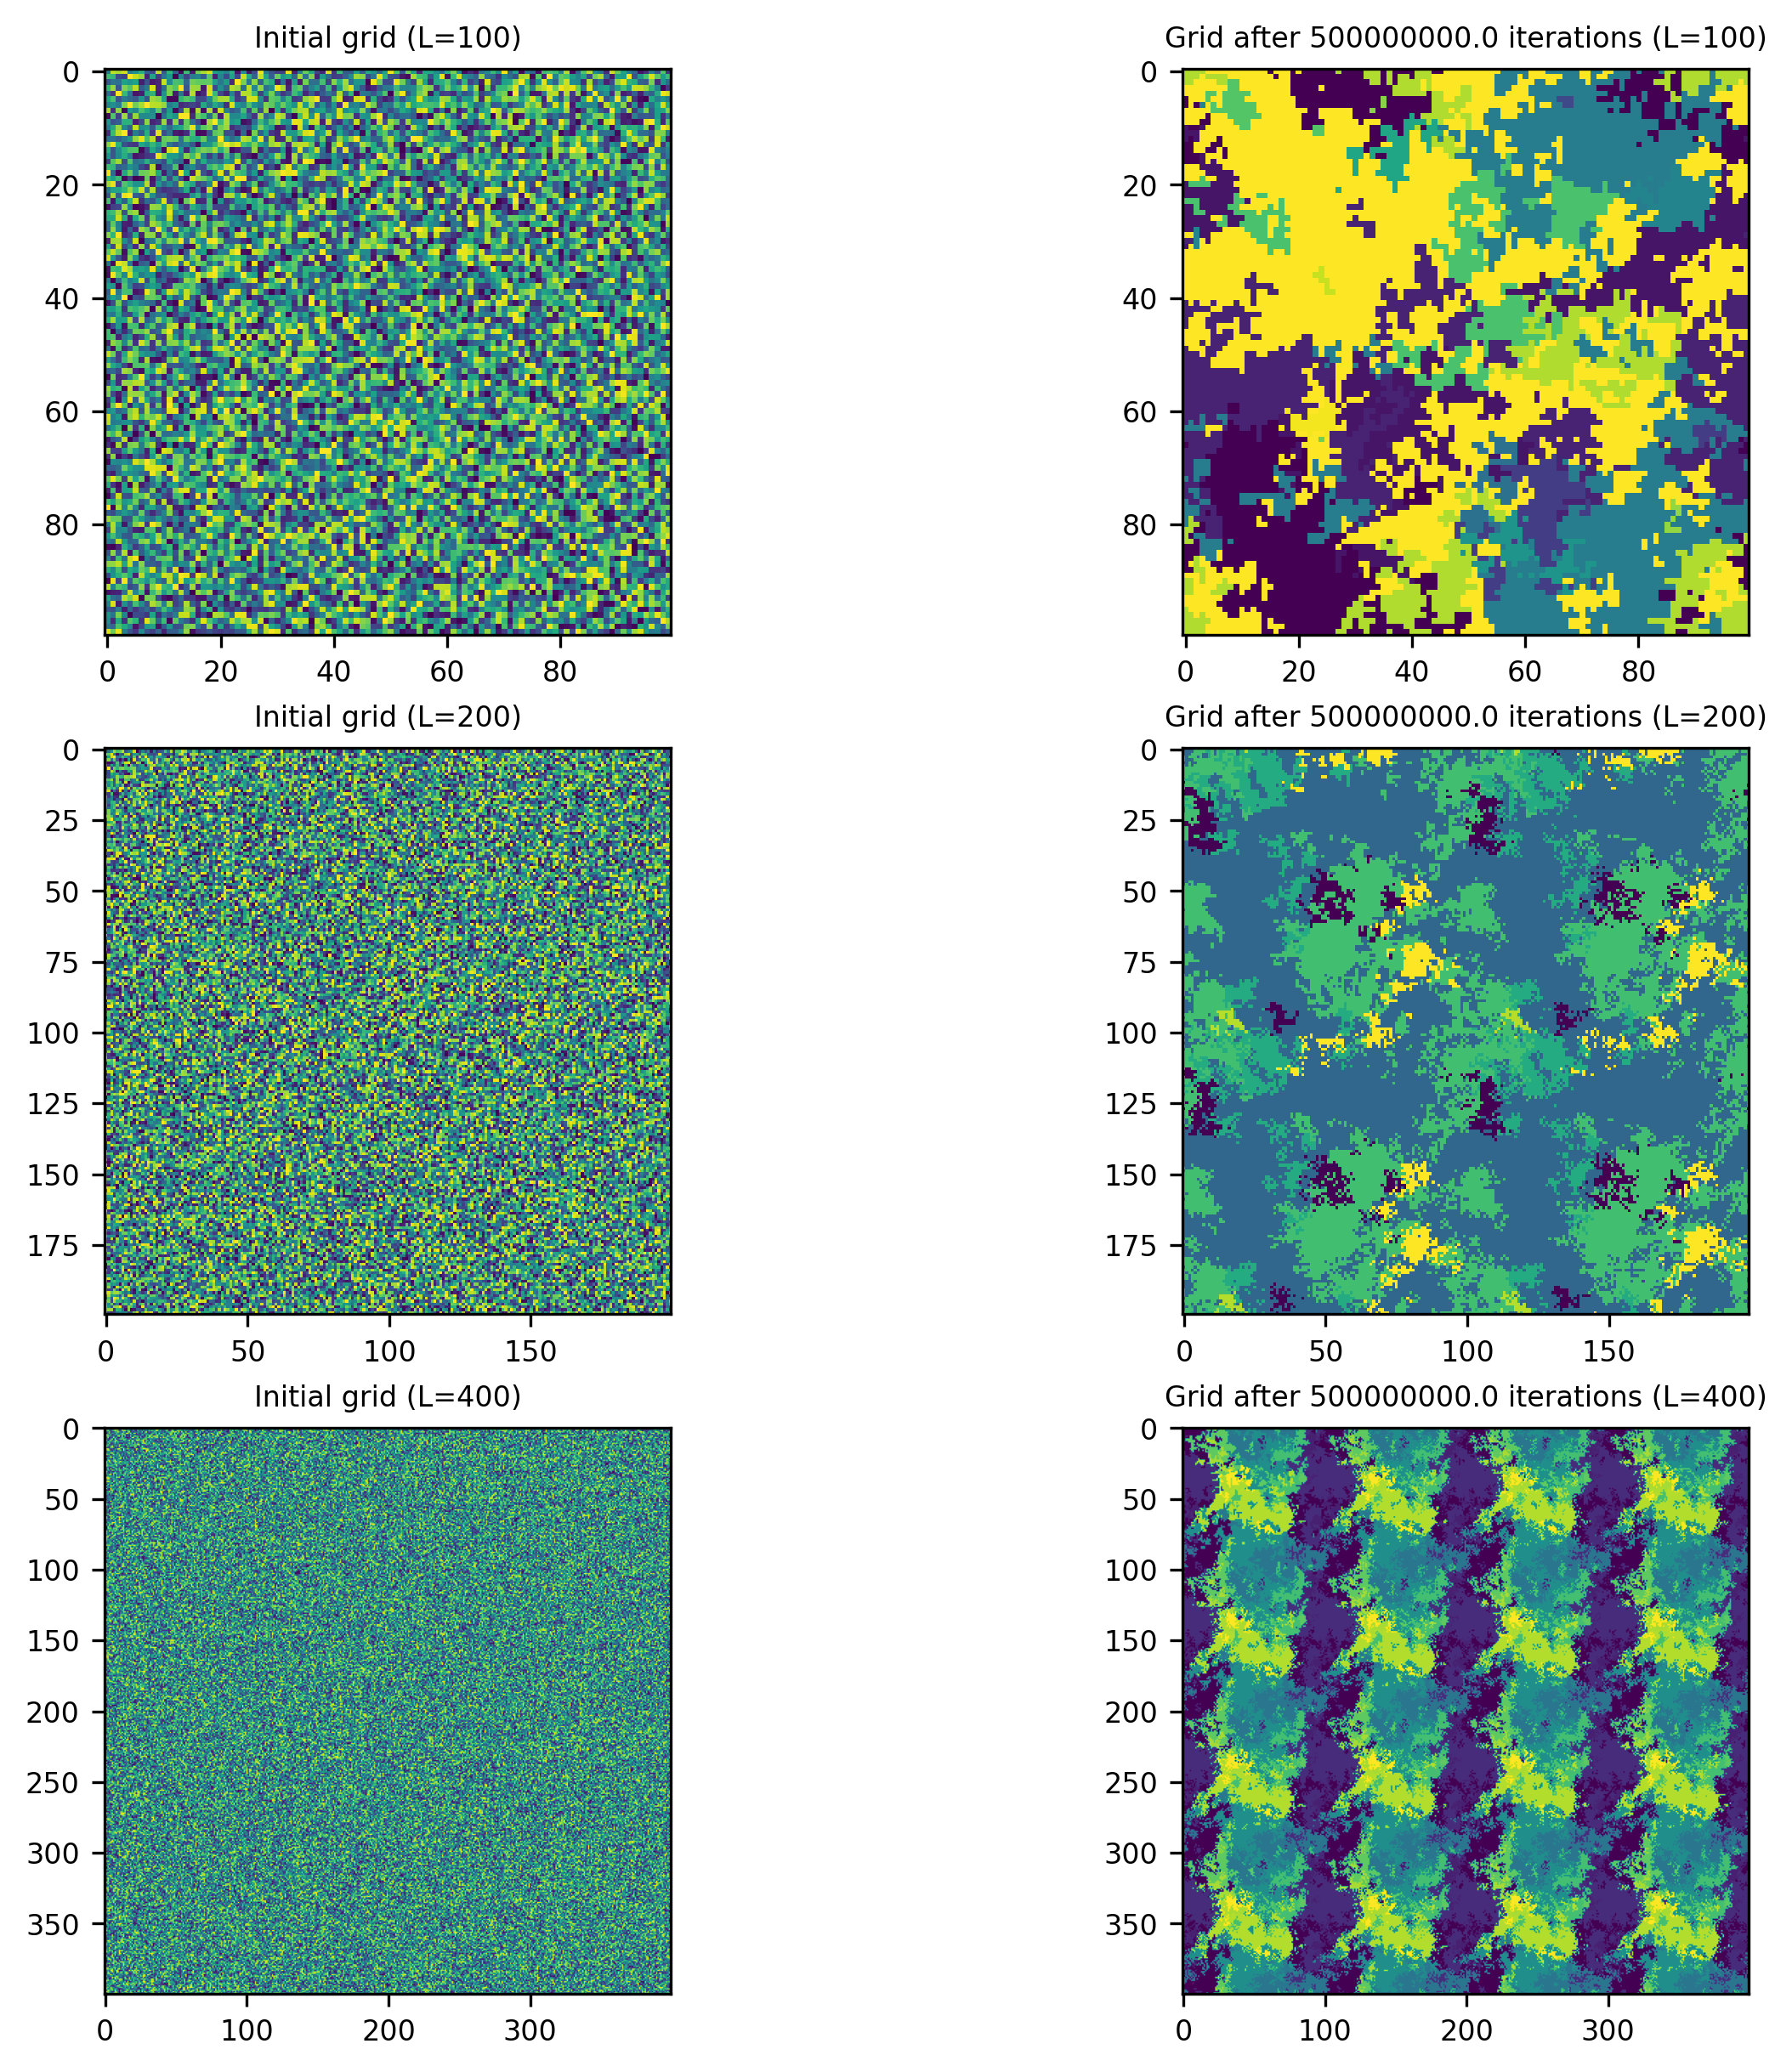

In [57]:
# Plot ecosystem visualization as 2D grid; before vs. after 5e8 iterations

mpl.rc('font', size=8)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (10,10))

ax1.imshow(all_grids_0[0])
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.set_title('Initial grid (L=100)', fontsize = 8)

ax2.imshow(all_grids[0])
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.set_title(f'Grid after {n_iters} iterations (L=100)', fontsize = 8)

ax3.imshow(all_grids_0[1])
ax3.tick_params(axis='x', labelsize=8)
ax3.tick_params(axis='y', labelsize=8)
ax3.set_title('Initial grid (L=200)', fontsize = 8)

ax4.imshow(all_grids[1])
ax4.tick_params(axis='x', labelsize=8)
ax4.tick_params(axis='y', labelsize=8)
ax4.set_title(f'Grid after {n_iters} iterations (L=200)', fontsize = 8)

ax5.imshow(all_grids_0[2])
ax5.tick_params(axis='x', labelsize=8)
ax5.tick_params(axis='y', labelsize=8)
ax5.set_title('Initial grid (L=400)', fontsize = 8)

ax6.imshow(all_grids[2])
ax6.tick_params(axis='x', labelsize=8)
ax6.tick_params(axis='y', labelsize=8)
ax6.set_title(f'Grid after {n_iters} iterations (L=400)', fontsize = 8)

plt.show()

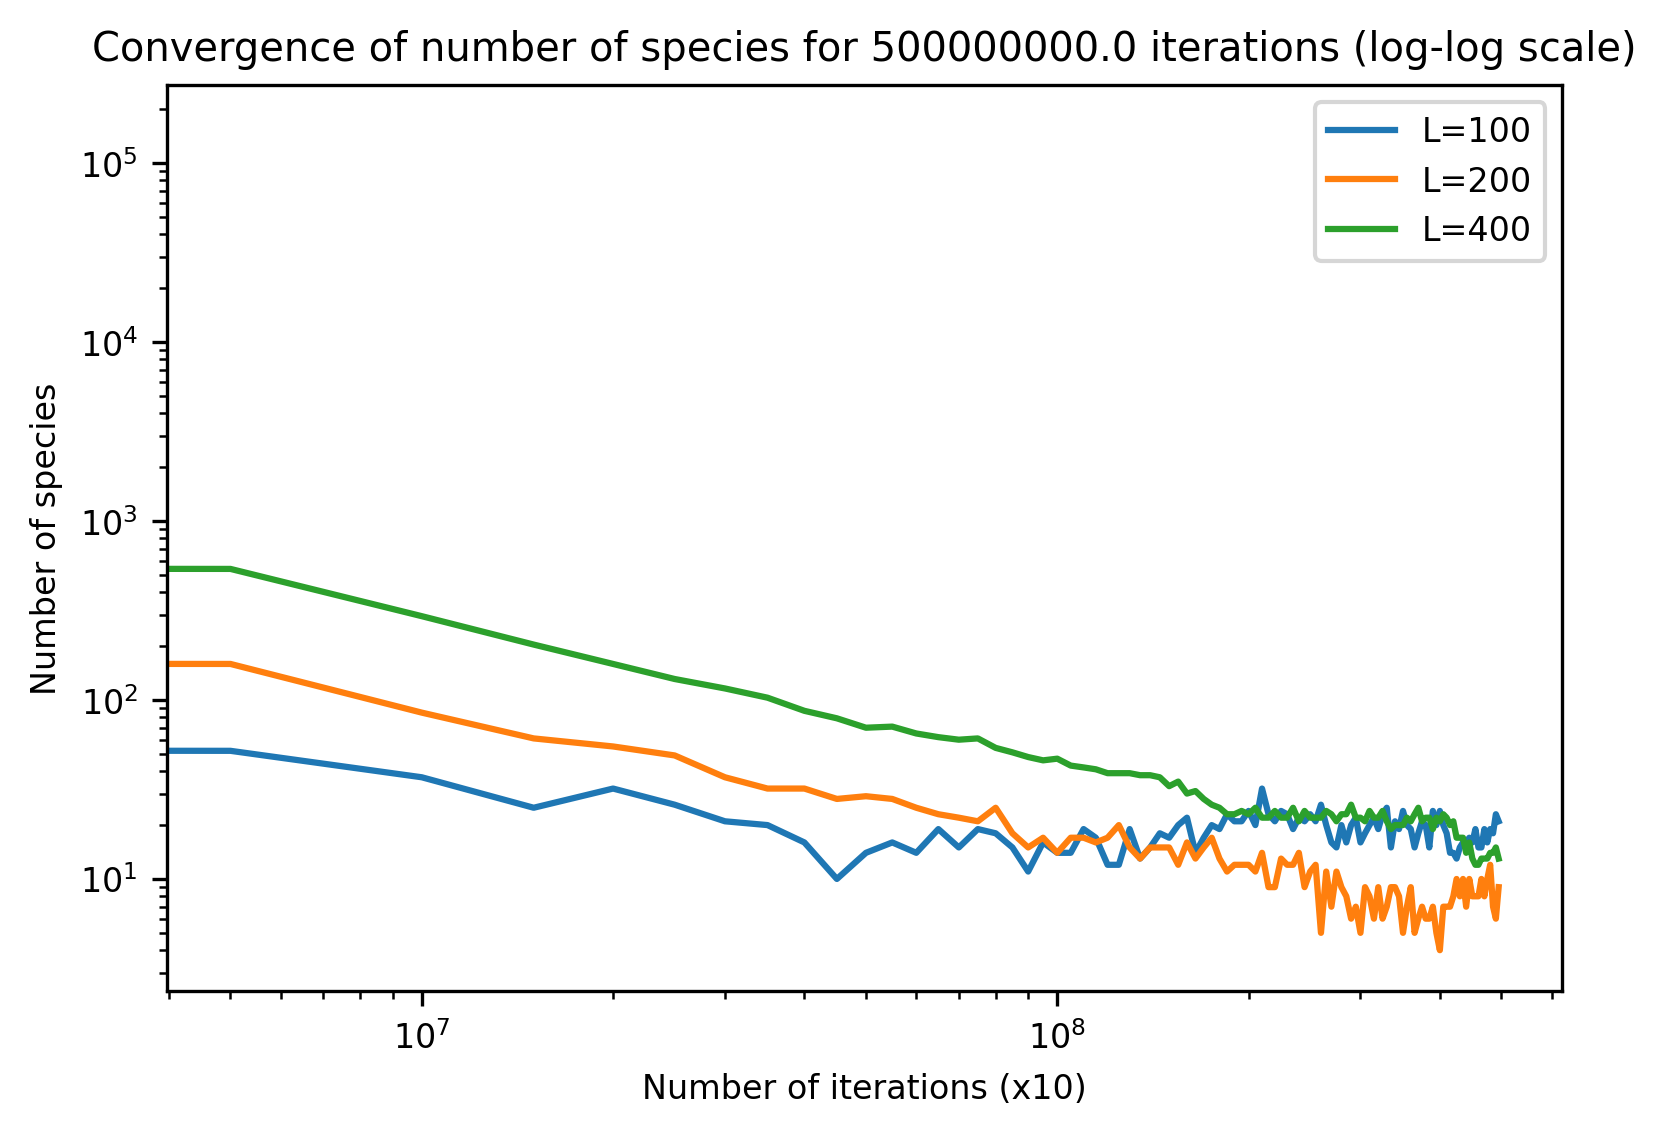

In [62]:
# Plot convergence of number species on log-log scale

plt.loglog(np.arange(0, n_iters, n_iters/100), all_num_species[0])
plt.loglog(np.arange(0, n_iters, n_iters/100), all_num_species[1])
plt.loglog(np.arange(0, n_iters, n_iters/100), all_num_species[2])
plt.legend(['L=100', 'L=200', 'L=400'])
plt.ylabel('Number of species')
plt.xlabel('Number of iterations (x10)')
plt.title(f'Convergence of number of species for {n_iters} iterations (log-log scale)')
plt.show()

[ 0.39231787 -0.02475628]
[0.17263107 0.42605724]
[0.13881351 1.26110286]


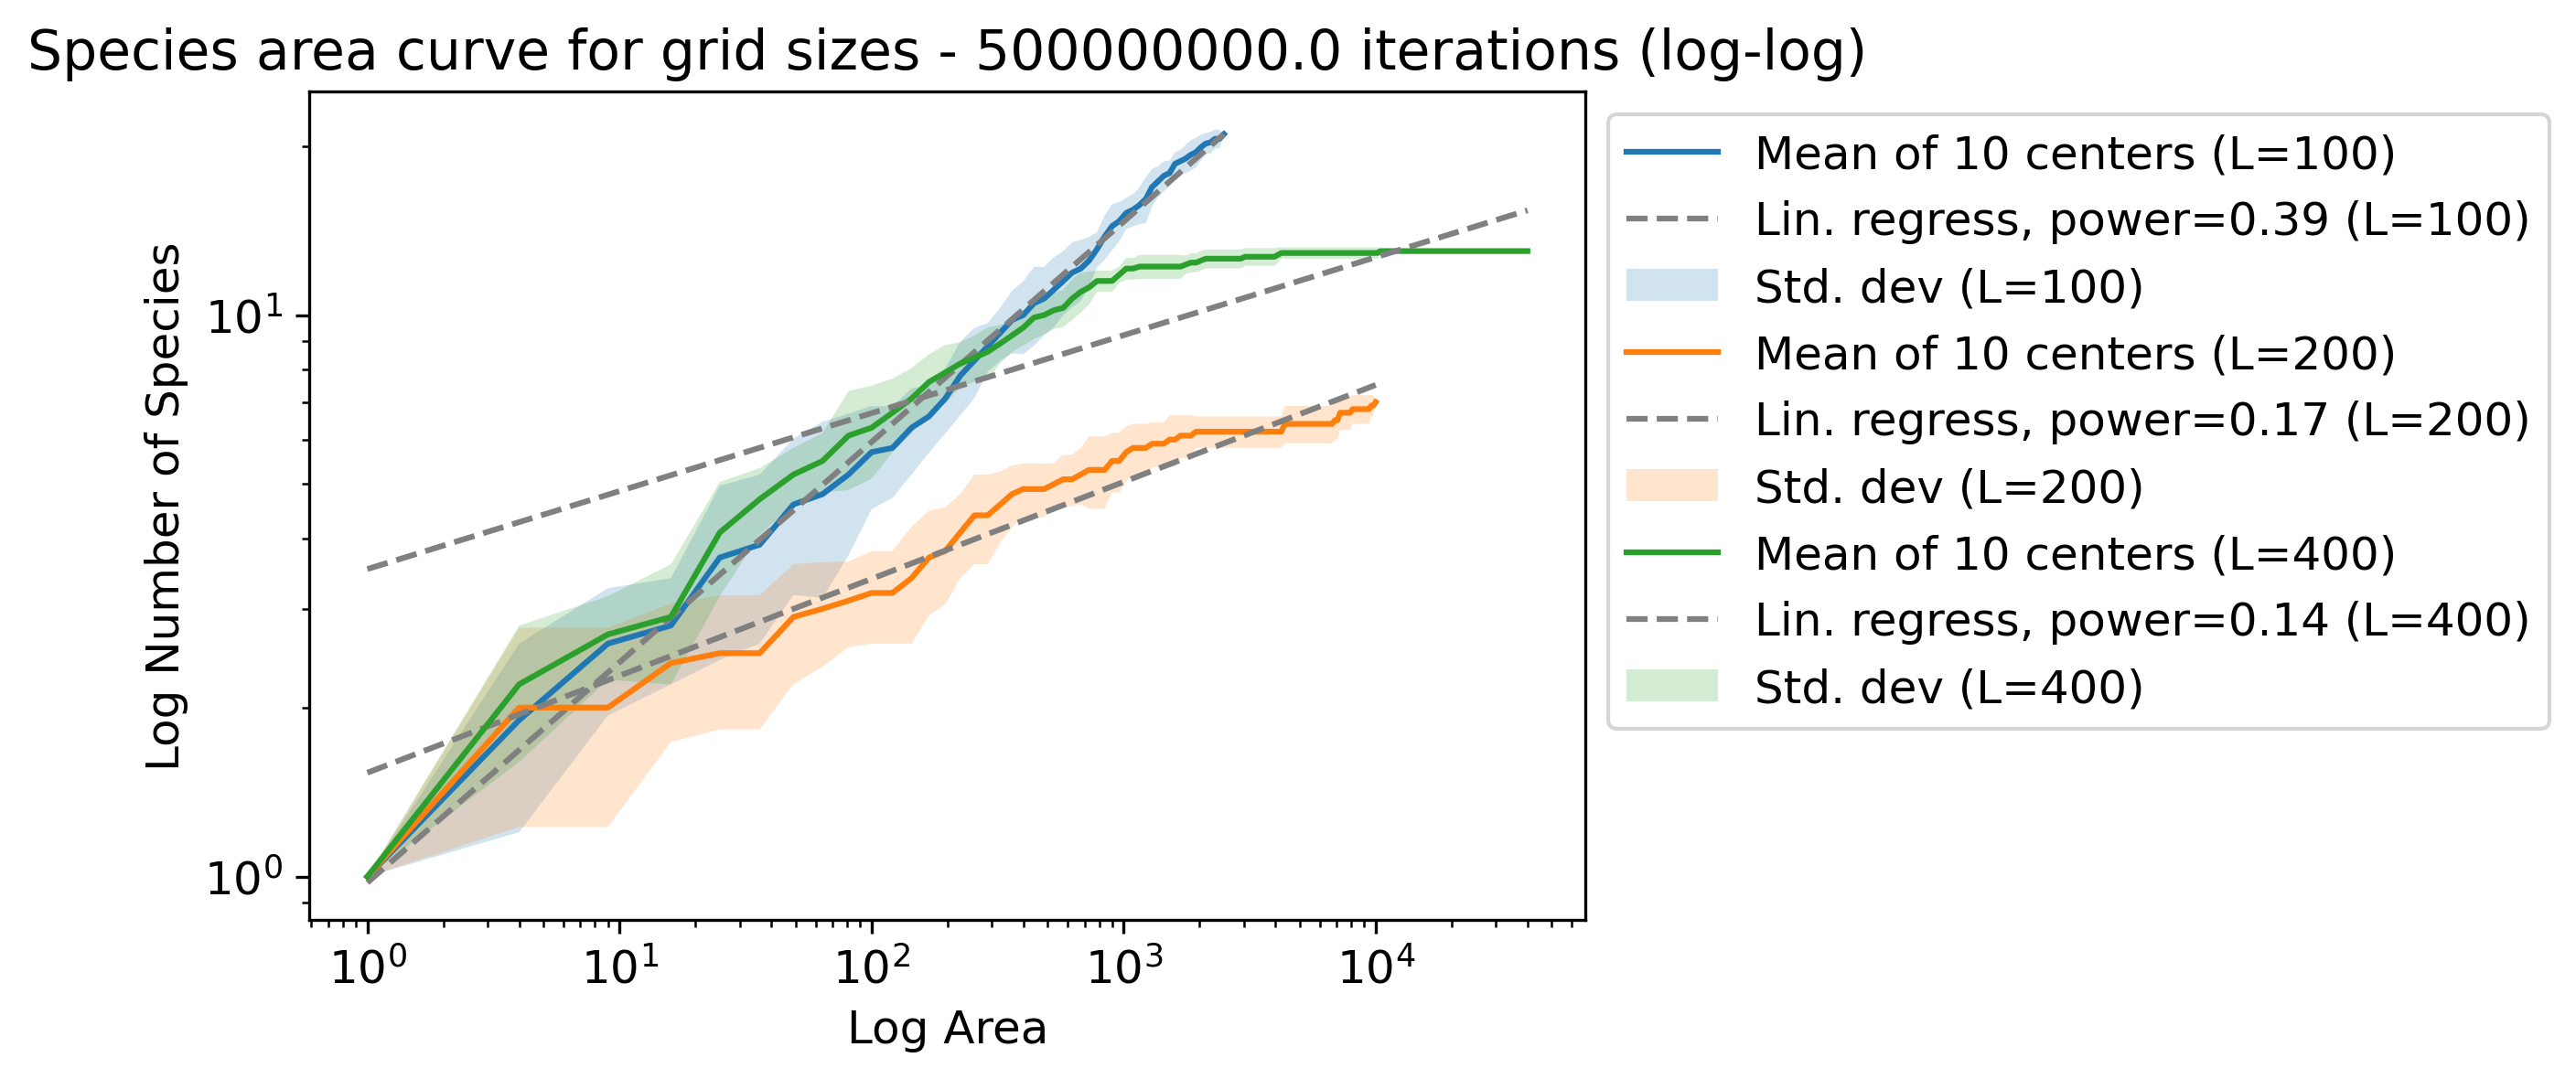

In [169]:
# Plot species-area curves for all grid sizes on log-log scale

for i in range(len(all_grids)):

    # Takes mean curve from computation 10 random centers
    areas, species = sa_curve(all_grids[i])

    # Compute mean and standard deviation of curves
    spec_std_dev = np.std(species, axis=0)
    spec_mean = np.mean(species, axis=0)

    # Fit linear regression
    poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)
    print(poly_coeffs)

    plt.loglog(areas, spec_mean, label=f'Mean of 10 centers (L={list_L[i]})')
    plt.loglog([areas[0], areas[-1]], 
            np.exp(poly_coeffs[1]) * np.array([areas[0], areas[-1]])**poly_coeffs[0], 
            color='grey', 
            linestyle='dashed',
            label=f'Lin. regress, power={round(poly_coeffs[0], 2)} (L={list_L[i]})')
    plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev (L={list_L[i]})')

plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for grid sizes - {n_iters} iterations (log-log)')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()